In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import ndex2
import ndex2.client
from ndex2 import cx2


In [18]:
filtered_network=pd.read_table('/filtered_interaction_network_version2.tsv')


In [19]:
import networkx as nx

# Create a graph 

filtered_nxg = nx.Graph()

# Add edges from DataFrame
filtered_nxg.add_weighted_edges_from(filtered_network.itertuples(index=False, name=None))
filtered_nxg


In [20]:
communities = nx.community.louvain_communities(filtered_nxg, resolution=5)


In [21]:
len(communities)

109

66

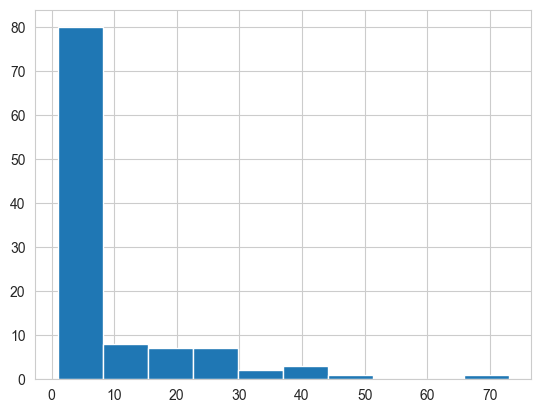

In [22]:


com_size = []
ones = 0
for community in communities:
    com_size.append(len(community))
    if len(community) == 1:
        ones += 1
plt.hist(com_size)

ones

In [23]:
label_list = []
nodes_list = []
general_label_list=[]
label = 1
for community in communities:
    for nod in community:
        label_list.append("community " + str(label))
        nodes_list.append(nod)
    general_label_list.append(label)
    label += 1

In [24]:
output_21_for_overlap_filtered = pd.DataFrame({"comm_id": general_label_list,
                             "comm": communities}
                             )


In [25]:
#sanity check
general_label_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109]

In [26]:
len(general_label_list)


109

In [27]:
output_21_for_overlap_filtered

,comm_id,comm
0,1,"{YWRQWOGXY, 7Y4OK6WUE, AQ69R055Z, 6L185X52Y, D..."
1,2,{GRBZP9AMN}
2,3,{X13HPGM1A}
3,4,{5SXEP0WKI}
4,5,{B1YGO6HY5}
...,...,...
104,105,{S8JIH40OC}
105,106,{AU6WSDEUP}
106,107,{2NSKWGEB8}
107,108,"{TER22Y23C, U8EMJ67QR, AZB66ZE59, HOGJPGIZZ, Y..."


In [28]:
output_21_for_overlap_filtered.to_csv("output_21 comm list filtered prime.csv", index=False)

In [29]:
output_21 = pd.DataFrame({"id": range(len(nodes_list)),
                             "xxx": nodes_list,
                             "prediction": label_list})


In [ ]:
#second commmunity set with random initialization


In [ ]:
communities = nx.community.louvain_communities(filtered_nxg, resolution=5)


In [ ]:
label_list = []
nodes_list = []
general_label_list = []
label = 1
for community in communities:
    for nod in community:
        label_list.append("community " + str(label))
        nodes_list.append(nod)
    general_label_list.append(label)
    label += 1


In [ ]:
output_21_for_overlap_filtered = pd.DataFrame({"comm_id": general_label_list,
                                               "comm": communities}
                                              )


In [ ]:
output_21 = pd.DataFrame({"id": range(len(nodes_list)),
                             "xxx": nodes_list,
                             "prediction": label_list})


In [30]:

output_21.to_csv("/output_21 prime.csv", index=False)


In [31]:
# Define Jaccard Similarity Function
def jaccard_similarity(set1, set2):
    return len(set1 & set2) / len(set1 | set2) if len(set1 | set2) > 0 else 0


In [33]:
#  two different community set
partition1 = pd.read_csv("output_21 comm list filtered.csv")
partition2 =pd.read_csv("output_21 comm list filtered prime.csv")
partition2

,comm_id,comm
0,1,"{'YWRQWOGXY', '7Y4OK6WUE', 'AQ69R055Z', '6L185..."
1,2,{'GRBZP9AMN'}
2,3,{'X13HPGM1A'}
3,4,{'5SXEP0WKI'}
4,5,{'B1YGO6HY5'}
...,...,...
104,105,{'S8JIH40OC'}
105,106,{'AU6WSDEUP'}
106,107,{'2NSKWGEB8'}
107,108,"{'TER22Y23C', 'U8EMJ67QR', 'AZB66ZE59', 'HOGJP..."


In [34]:
import numpy as np

In [36]:

# Convert  for easy comparison
comm1_sets_pre = [comm for comm in partition1["comm"]]
comm2_sets_pre = [comm for comm in partition2["comm"]]


In [37]:
# communities are as strings I need to convert them to list or set 

In [39]:
comm1_sets_polished=[comm.translate(str.maketrans("","","{}")) for comm in comm1_sets_pre ]
#sanity check
#comm1_sets_polished[0]
len(comm1_sets_polished)

113

In [41]:
comm2_sets_polished=[comm.translate(str.maketrans("","","{}")) for comm in comm2_sets_pre ]
#sanity check
comm2_sets_polished[0]
#len(comm1_sets_polished)

"'YWRQWOGXY', '7Y4OK6WUE', 'AQ69R055Z', '6L185X52Y', 'DS78QQXGW', 'JE80YJ1IN', 'VA4SXLLR5', '7Q1COC0ZE', 'DBP7NP5YE', '9IIOSGCMD', 'Q4JG9LJV1', 'VPGEFD68Q', 'OY6QMFL84', 'YF41U5FY6', '21QW58OKO', '014RTH812', '4WK5AWN01', 'IXK1CISFX', '563I60QTS', 'ZBLZIXJDM', '7HHTPPF4Y', 'U95UK89JI', '2TS5RQWDI', 'WPCIJLU3N', 'JNZ6OMRZO', 'A9D8K3P9O', '35N5502MV', '5TAREL6KW', 'OBT4O2J17', 'CSVH2PL9J', 'O893081J5', '4GZKRJA02', '5TWG6M09W', 'DWW5SV8NM', '53TVZQWLY', 'ADMGIKK1Z', 'PJGEJG64N', 'HQX7RUCJH'"

In [42]:
comm1_sets = [set(s.replace("'", "").split(", ")) for s in comm1_sets_polished ] # Remove single quotes and split
comm1_sets

[{'2TS5RQWDI',
  '35N5502MV',
  '4GZKRJA02',
  '4WK5AWN01',
  '53TVZQWLY',
  '563I60QTS',
  '5TAREL6KW',
  '5TWG6M09W',
  '6L185X52Y',
  '7HHTPPF4Y',
  '7Q1COC0ZE',
  '7Y4OK6WUE',
  '9IIOSGCMD',
  'ADMGIKK1Z',
  'AQ69R055Z',
  'CSVH2PL9J',
  'DBP7NP5YE',
  'DS78QQXGW',
  'DWW5SV8NM',
  'HQX7RUCJH',
  'IXK1CISFX',
  'JE80YJ1IN',
  'JNZ6OMRZO',
  'OBT4O2J17',
  'OY6QMFL84',
  'Q4JG9LJV1',
  'U95UK89JI',
  'VA4SXLLR5',
  'VPGEFD68Q',
  'WPCIJLU3N',
  'YF41U5FY6',
  'YWRQWOGXY',
  'ZBLZIXJDM'},
 {'G1E1VI9PT'},
 {'X13HPGM1A'},
 {'J9W1YQQVX'},
 {'20CKF3ZWL',
  '2Z2IKU9RE',
  '5NWE9939I',
  '88LHNKT82',
  '8P4EDJX9M',
  '9JISZW2D3',
  'B216RPXJ7',
  'BE7XGNEPB',
  'DQGR15TYR',
  'EO4PZE0AL',
  'HXEDAYCK4',
  'IIO55NSRS',
  'MEKD7VKBL',
  'O4UQAQWKH',
  'ORGS022F3',
  'Q5EHPLYEH',
  'RNFE2L77J'},
 {'7EOSTUJE2'},
 {'EMFURT241'},
 {'3GJPR4QJK'},
 {'8NAX0KMZL'},
 {'9T5KNHU4E'},
 {'C7SAB7SNT'},
 {'282HYXY0Z',
  '85GKX35QF',
  '92HJ1N39X',
  '9DQ2WADQP',
  'EUDIR1RMW',
  'GXETTZVTV',
  'H63E8IF3T',

In [43]:
type(comm1_sets[0])

set

In [44]:
comm2_sets = [set(s.replace("'", "").split(", ")) for s in comm2_sets_polished ] # Remove single quotes and split
comm2_sets

[{'014RTH812',
  '21QW58OKO',
  '2TS5RQWDI',
  '35N5502MV',
  '4GZKRJA02',
  '4WK5AWN01',
  '53TVZQWLY',
  '563I60QTS',
  '5TAREL6KW',
  '5TWG6M09W',
  '6L185X52Y',
  '7HHTPPF4Y',
  '7Q1COC0ZE',
  '7Y4OK6WUE',
  '9IIOSGCMD',
  'A9D8K3P9O',
  'ADMGIKK1Z',
  'AQ69R055Z',
  'CSVH2PL9J',
  'DBP7NP5YE',
  'DS78QQXGW',
  'DWW5SV8NM',
  'HQX7RUCJH',
  'IXK1CISFX',
  'JE80YJ1IN',
  'JNZ6OMRZO',
  'O893081J5',
  'OBT4O2J17',
  'OY6QMFL84',
  'PJGEJG64N',
  'Q4JG9LJV1',
  'U95UK89JI',
  'VA4SXLLR5',
  'VPGEFD68Q',
  'WPCIJLU3N',
  'YF41U5FY6',
  'YWRQWOGXY',
  'ZBLZIXJDM'},
 {'GRBZP9AMN'},
 {'X13HPGM1A'},
 {'5SXEP0WKI'},
 {'B1YGO6HY5'},
 {'BGUFELJ2L', 'HYDRDQX13', 'YXSWVY18V'},
 {'UCSE57GD7'},
 {'7EOSTUJE2'},
 {'EMFURT241'},
 {'02OAXUDJX',
  '0SN4HYKQJ',
  '14DU9AMYQ',
  '2CWQPKMAH',
  '4JXE6A4NR',
  '55ZO4CT0N',
  '66BZIVHMQ',
  '860H86ITI',
  '8WWQYBOF3',
  'AGQEHUNRX',
  'AZXLPGDE6',
  'CXMGWAJYV',
  'GHC4Y3U9D',
  'GXDRJ4TRK',
  'GZ8IPL53J',
  'ISJRFYV8V',
  'LBXY2XIQG',
  'LN842KM7D',
  'M2

In [ ]:
#it's to correct lists correct them here

In [45]:
partition1["comm"]=comm1_sets

In [46]:
partition2["comm"]=comm2_sets

In [47]:
# Compute Jaccard similarity matrix
similarity_matrix = np.array([[jaccard_similarity(c1, c2) for c2 in comm2_sets] for c1 in comm1_sets])


In [48]:
similarity_matrix

array([[0.86842105, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [49]:

# Find best match for each community in Partition 1
best_matches = np.argmax(similarity_matrix, axis=1)


In [50]:
np.max(similarity_matrix, axis=1)
#checking that  it's not only 0 and 1

array([0.86842105, 1.        , 1.        , 1.        , 0.25      ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.63157895, 1.        , 1.        , 1.        ,
       1.        , 0.5       , 0.85      , 0.05555556, 0.35849057,
       0.38297872, 0.80952381, 0.92857143, 0.04166667, 0.66666667,
       1.        , 0.33333333, 1.        , 1.        , 0.14285714,
       0.08333333, 1.        , 1.        , 0.14285714, 1.        ,
       0.97333333, 0.66666667, 0.22222222, 1.        , 0.60526316,
       0.35714286, 0.96875   , 1.        , 0.08333333, 0.5       ,
       1.        , 1.        , 1.        , 0.3125    , 1.        ,
       0.2       , 1.        , 0.42857143, 0.96153846, 1.        ,
       1.        , 0.5       , 0.3       , 1.        , 0.33333333,
       1.        , 0.05555556, 0.15384615, 0.5       , 0.09090909,
       0.58823529, 0.66666667, 1.        , 1.        , 1.        ,
       0.55      , 0.89285714, 1.        , 0.33333333, 1.     

In [51]:
best_matches

array([  0,  58,   2,  93,  10,   7,   8,  98,  24,  97,  13,  14,  16,
        65,  11,  75, 106,  76,  21,  20,  52,  28,  49,  20,  23,  33,
        48,  34,  66,  50,  42,  72,  47,  87,   1,  15,  37,  38,  19,
        26,  42,  96,  71,  61,  10, 104,  94, 103,  50,  41,  46,  84,
        64,  17,  22,  44,  80,  78,  63,   5,  82,  10,  57, 102,  57,
        61,  62,  36,  45, 105,  21,   9,  88,  68,  67,  27,  46,  85,
        18,  89,  73,  87,   4,  54,  43,  74,  69,  39,  31,   6,  79,
        91,  81,  92,  59,  81,  35,  77, 107,  90,  51, 108,   3,  40,
        32,  83, 100,  86,  60,  25,  12,  56,  51])

In [146]:
len(set (best_matches))
#some of htem have same best match

221

In [52]:


# Print matching results
match_of_1_in_2=[]
Jaccard_list=[]
for i, best_match in enumerate(best_matches):
    print(f"Community {i+1} in Partition 1 best matches with Community {best_match+1} in Partition 2 (Jaccard = {similarity_matrix[i, best_match]:.2f})")# i+1 to match my comm_ id in csv file
    match_of_1_in_2.append(best_match+1)
    Jaccard_list.append(similarity_matrix[i, best_match])

Community 1 in Partition 1 best matches with Community 1 in Partition 2 (Jaccard = 0.87)
Community 2 in Partition 1 best matches with Community 59 in Partition 2 (Jaccard = 1.00)
Community 3 in Partition 1 best matches with Community 3 in Partition 2 (Jaccard = 1.00)
Community 4 in Partition 1 best matches with Community 94 in Partition 2 (Jaccard = 1.00)
Community 5 in Partition 1 best matches with Community 11 in Partition 2 (Jaccard = 0.25)
Community 6 in Partition 1 best matches with Community 8 in Partition 2 (Jaccard = 1.00)
Community 7 in Partition 1 best matches with Community 9 in Partition 2 (Jaccard = 1.00)
Community 8 in Partition 1 best matches with Community 99 in Partition 2 (Jaccard = 1.00)
Community 9 in Partition 1 best matches with Community 25 in Partition 2 (Jaccard = 1.00)
Community 10 in Partition 1 best matches with Community 98 in Partition 2 (Jaccard = 1.00)
Community 11 in Partition 1 best matches with Community 14 in Partition 2 (Jaccard = 1.00)
Community 12

In [53]:
match_of_1_in_2

[1,
 59,
 3,
 94,
 11,
 8,
 9,
 99,
 25,
 98,
 14,
 15,
 17,
 66,
 12,
 76,
 107,
 77,
 22,
 21,
 53,
 29,
 50,
 21,
 24,
 34,
 49,
 35,
 67,
 51,
 43,
 73,
 48,
 88,
 2,
 16,
 38,
 39,
 20,
 27,
 43,
 97,
 72,
 62,
 11,
 105,
 95,
 104,
 51,
 42,
 47,
 85,
 65,
 18,
 23,
 45,
 81,
 79,
 64,
 6,
 83,
 11,
 58,
 103,
 58,
 62,
 63,
 37,
 46,
 106,
 22,
 10,
 89,
 69,
 68,
 28,
 47,
 86,
 19,
 90,
 74,
 88,
 5,
 55,
 44,
 75,
 70,
 40,
 32,
 7,
 80,
 92,
 82,
 93,
 60,
 82,
 36,
 78,
 108,
 91,
 52,
 109,
 4,
 41,
 33,
 84,
 101,
 87,
 61,
 26,
 13,
 57,
 52]

In [83]:
Jaccard_list

[0.868421052631579,
 1.0,
 1.0,
 1.0,
 0.25,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.631578947368421,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 0.85,
 0.05555555555555555,
 0.3584905660377358,
 0.3829787234042553,
 0.8095238095238095,
 0.9285714285714286,
 0.041666666666666664,
 0.6666666666666666,
 1.0,
 0.3333333333333333,
 1.0,
 1.0,
 0.14285714285714285,
 0.08333333333333333,
 1.0,
 1.0,
 0.14285714285714285,
 1.0,
 0.9733333333333334,
 0.6666666666666666,
 0.2222222222222222,
 1.0,
 0.6052631578947368,
 0.35714285714285715,
 0.96875,
 1.0,
 0.08333333333333333,
 0.5,
 1.0,
 1.0,
 1.0,
 0.3125,
 1.0,
 0.2,
 1.0,
 0.42857142857142855,
 0.9615384615384616,
 1.0,
 1.0,
 0.5,
 0.3,
 1.0,
 0.3333333333333333,
 1.0,
 0.05555555555555555,
 0.15384615384615385,
 0.5,
 0.09090909090909091,
 0.5882352941176471,
 0.6666666666666666,
 1.0,
 1.0,
 1.0,
 0.55,
 0.8928571428571429,
 1.0,
 0.3333333333333333,
 1.0,
 0.46808510638297873,
 0.5,
 0.3333333333333333,
 1.0,
 0.2571428571428571,
 1.0,
 0.125,
 1.0,

Text(0.5, 1.0, 'Jaccard value distribution for matched communities')

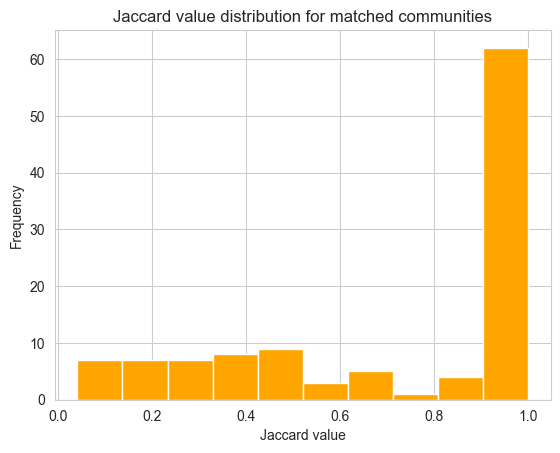

In [97]:
plt.hist(Jaccard_list,color="orange")
plt.xlabel("Jaccard value")
plt.ylabel("Frequency")
plt.title("Jaccard value distribution for matched communities")

In [55]:
partition1["match_of_1_in_2"]=match_of_1_in_2

In [56]:
partition1["Jaccard"]=Jaccard_list

In [66]:
len(set(match_of_1_in_2))

101

In [57]:
partition1

,comm_id,comm,match_of_1_in_2,Jaccard
0,1,"{YWRQWOGXY, 7Y4OK6WUE, AQ69R055Z, 6L185X52Y, D...",1,0.868421
1,2,{G1E1VI9PT},59,1.000000
2,3,{X13HPGM1A},3,1.000000
3,4,{J9W1YQQVX},94,1.000000
4,5,"{HXEDAYCK4, DQGR15TYR, 8P4EDJX9M, Q5EHPLYEH, E...",11,0.250000
...,...,...,...,...
108,109,{R2T87O3FO},61,1.000000
109,110,{J5XGQ0VWB},26,1.000000
110,111,"{G4DG2KL3W, KCHOBK8DZ, H8C8V4AOO, XO2IP210Q, B...",13,0.923077
111,112,{KFFYJ83IG},57,1.000000


In [58]:
partition2

,comm_id,comm
0,1,"{YWRQWOGXY, 7Y4OK6WUE, AQ69R055Z, 6L185X52Y, D..."
1,2,{GRBZP9AMN}
2,3,{X13HPGM1A}
3,4,{5SXEP0WKI}
4,5,{B1YGO6HY5}
...,...,...
104,105,{S8JIH40OC}
105,106,{AU6WSDEUP}
106,107,{2NSKWGEB8}
107,108,"{AZB66ZE59, YA54L81JN, HF6FBYY47, TER22Y23C, U..."


In [59]:
partition2 = partition2.set_index('comm_id')


In [153]:
partition2

,comm
comm_id,
1,"{'MBVY8ZOXM', '8M8AMIVK1', '27FLMZ4FU', 'S1K1G..."
2,"{'0SPFULQB2', 'XKAJ06NMX', 'LBTT9SRNJ', 'DYH3U..."
3,"{'YOD8YZGSW', '5NWE9939I', 'JZ6Q6V0R5', 'T250B..."
4,"{'XHULOFY37', '21WBF7ZRC', '55ZLDFLEC', 'FDNF8..."
5,"{'U95UK89JI', 'V6CEHJHO2', 'YWRQWOGXY'}"
...,...
220,"{'FVPISM9IW', '9N7FV77E0', 'HVDYNMC2W', 'W1VV8..."
221,"{'L0AH57QDM', 'K24MFVA0C', 'UU7FP1N2N', 'NWVZW..."
222,"{'T1DE1F1EQ', 'DQCQXJ95E', 'G19FYGBGX', '4MUO7..."


In [60]:
partition1 = partition1.set_index('comm_id')

In [62]:
output_prime_for_finding_community=pd.read_csv("/output_21 prime.csv", index_col="xxx")
output_prime_for_finding_community

,id,prediction
xxx,,
YWRQWOGXY,0,community 1
7Y4OK6WUE,1,community 1
AQ69R055Z,2,community 1
6L185X52Y,3,community 1
DS78QQXGW,4,community 1
...,...,...
HOGJPGIZZ,836,community 108
YA54L81JN,837,community 108
HF6FBYY47,838,community 108


In [69]:
label_list = []
nodes_list = []

community_assignment={}
label = 1

for i in partition1.index:
    #print(i)    
    for nod in partition1.loc[i]["comm"]:
        community_assignment[nod]=["community " + str(i)] #str(i+1) is the comm id in csv file
 
for i in partition1.index:
        
    if partition1.loc[i]["Jaccard"]!=1:
        match_id_in2=partition1.loc[i]["match_of_1_in_2"]
        if (len(partition1.loc[i]["comm"]))>(len(partition2.loc[match_id_in2]["comm"])):
            for protein in partition1.loc[match_id_in2]["comm"]:
                if protein not in partition2.loc[match_id_in2]["comm"]:  
                    #check if protein exist in the other community set
                    if protein in output_prime_for_finding_community.index:
                        
                        p2_comm_raw=output_prime_for_finding_community.loc[protein]["prediction"] #out put format : community 105
                        #keep the number part
                        p2_comm=int(p2_comm_raw.replace("community ",""))
                        #what does it match to in partiton 1
                        try:
                            matching_p1_comm=partition1.loc[partition1['match_of_1_in_2'] == p2_comm].index[0]
                        except IndexError:
                            pass
                        #add it as another community for "protein"
                        community_assignment[protein].append("community " + str(matching_p1_comm))
                        
                    else:
                        pass
                          
           
            
        if (len(partition1.loc[i]["comm"]))<(len(partition2.loc[match_id_in2]["comm"])):
            for protein in partition2.loc[match_id_in2]["comm"]:
                if protein not in partition1.loc[i]["comm"]:
                    try:
                        community_assignment[protein].append("community " + str(i))
                    except KeyError:
                        pass
                  
            pass


In [70]:
len(community_assignment)

841

In [201]:
partition1

,comm,match_of_1_in_2,Jaccard
comm_id,,,
1,"{0SPFULQB2, XKAJ06NMX, DYH3UPRT6, LBTT9SRNJ}",2,1.0
2,"{5NWE9939I, YOD8YZGSW, JZ6Q6V0R5, T250BTXXU}",3,1.0
3,"{DBFCCYYS4, 5L4613R0F, Q37JRFXTW, K35JWESH7, 4...",8,1.0
4,"{D3DJPOV8E, LUISMZKLL, PZNPQ46RS, 4KYDN84EO, 7...",114,0.8
5,"{QLKMDFD8J, QJ5DSH3NY, PTIN3BKVO, VWYSAPVHO, A...",188,1.0
...,...,...,...
220,"{NWVZWPHGI, K24MFVA0C, UU7FP1N2N, XDJ0ZXD2Y, L...",221,1.0
221,"{DZR84R00R, OFHM78QPM, 0NZC796D1, Q02MDGL7X, 0...",180,0.8
222,"{45HJJTZOK, BEHVOEKQA, RGQG98XAC, 6JD23QDD9, 2...",187,1.0


In [71]:
community_assignment

{'YWRQWOGXY': ['community 1'],
 '7Y4OK6WUE': ['community 1'],
 'AQ69R055Z': ['community 1'],
 '6L185X52Y': ['community 1'],
 'DS78QQXGW': ['community 1'],
 'JE80YJ1IN': ['community 1'],
 'VA4SXLLR5': ['community 1'],
 '7Q1COC0ZE': ['community 1'],
 'DBP7NP5YE': ['community 1'],
 'Q4JG9LJV1': ['community 1'],
 '9IIOSGCMD': ['community 1'],
 'VPGEFD68Q': ['community 1'],
 'OY6QMFL84': ['community 1'],
 'YF41U5FY6': ['community 1'],
 '4WK5AWN01': ['community 1'],
 'IXK1CISFX': ['community 1'],
 '7HHTPPF4Y': ['community 1'],
 '563I60QTS': ['community 1'],
 'ZBLZIXJDM': ['community 1'],
 'U95UK89JI': ['community 1'],
 '2TS5RQWDI': ['community 1'],
 'WPCIJLU3N': ['community 1'],
 'JNZ6OMRZO': ['community 1'],
 '35N5502MV': ['community 1'],
 '5TAREL6KW': ['community 1'],
 'OBT4O2J17': ['community 1'],
 'CSVH2PL9J': ['community 1'],
 '4GZKRJA02': ['community 1'],
 '5TWG6M09W': ['community 1'],
 '53TVZQWLY': ['community 1'],
 'DWW5SV8NM': ['community 1'],
 'ADMGIKK1Z': ['community 1'],
 'HQX7RU

In [72]:
len(community_assignment)

841

In [73]:
com_size = []
ones = 0
for prn,community in community_assignment.items():
    com_size.append(len(community))
    if len(community) > 1:
        print(prn)
        print(community)
        ones += 1


HXEDAYCK4
['community 5', 'community 53']
DQGR15TYR
['community 5', 'community 89']
8P4EDJX9M
['community 5', 'community 45', 'community 62']
Q5EHPLYEH
['community 5', 'community 25']
BE7XGNEPB
['community 5', 'community 25']
20CKF3ZWL
['community 5', 'community 89']
RNFE2L77J
['community 5', 'community 53']
9JISZW2D3
['community 5', 'community 45', 'community 62']
88LHNKT82
['community 5', 'community 45', 'community 62']
5NWE9939I
['community 5', 'community 45', 'community 62']
O4UQAQWKH
['community 5', 'community 45', 'community 62']
ORGS022F3
['community 5', 'community 25']
B216RPXJ7
['community 5', 'community 45', 'community 62']
IIO55NSRS
['community 5', 'community 25']
MEKD7VKBL
['community 5', 'community 45', 'community 62']
2Z2IKU9RE
['community 5', 'community 89']
9T5KNHU4E
['community 10', 'community 10']
6M16PPENP
['community 13', 'community 13']
ADMQFHZK2
['community 16', 'community 16']
PNN04VV8I
['community 19', 'community 71']
E4PALJWI4
['community 20', 'community 24']
N

In [230]:
max(com_size)

2

Text(0.5, 1.0, 'ditribution of the number of communities assigned to each node')

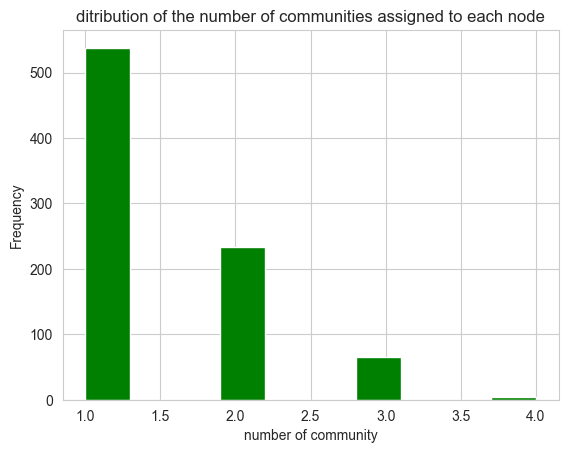

In [93]:
plt.hist(com_size,color="green")
plt.xlabel("number of community")
plt.ylabel("Frequency")
plt.title("ditribution of the number of communities assigned to each node")
# this is not community size, its ditribution of how many comms are assigned to each node

In [75]:
label_list=[]
nodes_list=[]

for prt,community in community_assignment.items():
    while community!=[]:
        nodes_list.append(prt)
        label_list.append(community[0])
        community.pop(0)

In [76]:
label_list

['community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 1',
 'community 2',
 'community 3',
 'community 4',
 'community 5',
 'community 53',
 'community 5',
 'community 89',
 'community 5',
 'community 45',
 'community 62',
 'community 5',
 'community 25',
 'community 5',
 'community 5',
 'community 25',
 'community 5',
 'community 89',
 'community 5',
 'community 53',
 'community 5',
 'community 45',
 'community 62',
 'community 5',
 'community 45',
 'community 62',
 'community 5',
 'community 45',
 'community 62',
 'communit

In [77]:
nodes_list

['YWRQWOGXY',
 '7Y4OK6WUE',
 'AQ69R055Z',
 '6L185X52Y',
 'DS78QQXGW',
 'JE80YJ1IN',
 'VA4SXLLR5',
 '7Q1COC0ZE',
 'DBP7NP5YE',
 'Q4JG9LJV1',
 '9IIOSGCMD',
 'VPGEFD68Q',
 'OY6QMFL84',
 'YF41U5FY6',
 '4WK5AWN01',
 'IXK1CISFX',
 '7HHTPPF4Y',
 '563I60QTS',
 'ZBLZIXJDM',
 'U95UK89JI',
 '2TS5RQWDI',
 'WPCIJLU3N',
 'JNZ6OMRZO',
 '35N5502MV',
 '5TAREL6KW',
 'OBT4O2J17',
 'CSVH2PL9J',
 '4GZKRJA02',
 '5TWG6M09W',
 '53TVZQWLY',
 'DWW5SV8NM',
 'ADMGIKK1Z',
 'HQX7RUCJH',
 'G1E1VI9PT',
 'X13HPGM1A',
 'J9W1YQQVX',
 'HXEDAYCK4',
 'HXEDAYCK4',
 'DQGR15TYR',
 'DQGR15TYR',
 '8P4EDJX9M',
 '8P4EDJX9M',
 '8P4EDJX9M',
 'Q5EHPLYEH',
 'Q5EHPLYEH',
 'EO4PZE0AL',
 'BE7XGNEPB',
 'BE7XGNEPB',
 '20CKF3ZWL',
 '20CKF3ZWL',
 'RNFE2L77J',
 'RNFE2L77J',
 '9JISZW2D3',
 '9JISZW2D3',
 '9JISZW2D3',
 '88LHNKT82',
 '88LHNKT82',
 '88LHNKT82',
 '5NWE9939I',
 '5NWE9939I',
 '5NWE9939I',
 'O4UQAQWKH',
 'O4UQAQWKH',
 'O4UQAQWKH',
 'ORGS022F3',
 'ORGS022F3',
 'B216RPXJ7',
 'B216RPXJ7',
 'B216RPXJ7',
 'IIO55NSRS',
 'IIO55NSRS',
 'MEKD

In [78]:
len(nodes_list)

1218

42

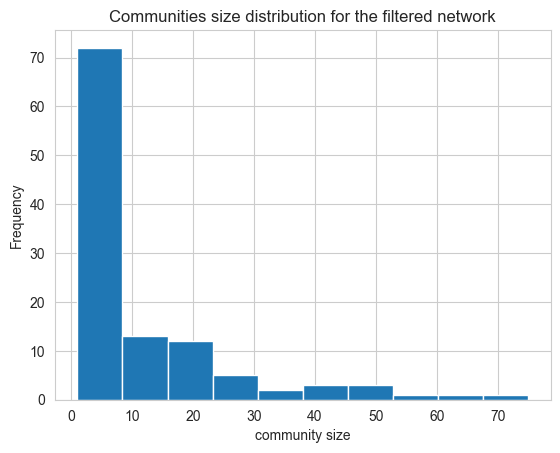

In [98]:
commu_size=[]
for cluster in set(label_list):
    commu_size.append(label_list.count(cluster))
plt.hist(commu_size )
plt.xlabel("community size")
plt.ylabel("Frequency")
plt.title("Communities size distribution for the filtered network")
commu_size.count(1)

In [80]:
final_outputMultiple=output_20 = pd.DataFrame({"id": range(len(nodes_list)),
                             "xxx": nodes_list,
                             "prediction": label_list})


In [81]:
final_outputMultiple.to_csv("output 21.csv", index=False)
